In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [9]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [84]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
df.drop('customerID', axis=1, inplace=True)

In [17]:
df.dropna(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [24]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

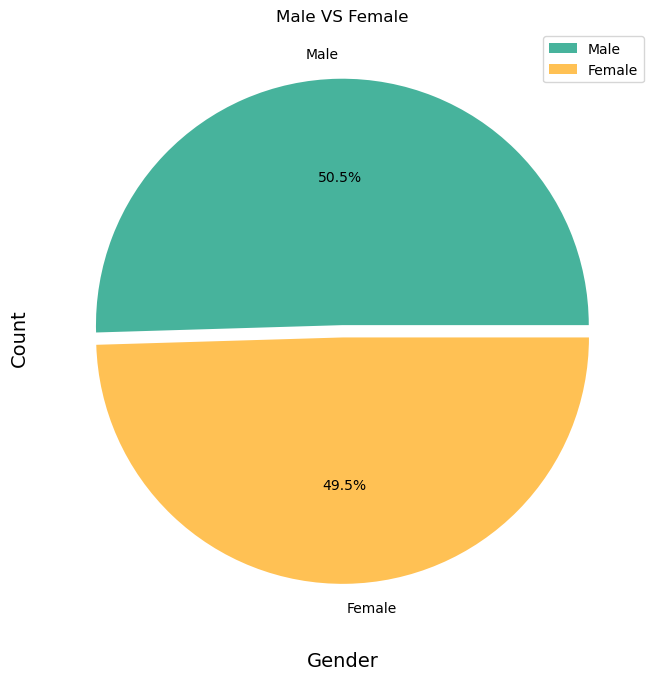

In [39]:
plt.figure(figsize=(12,8))

colors = ['#47B39C', '#FFC154']
explode = (0.05,0)
gender_count = df['gender'].value_counts()
gender_count.plot(kind = 'pie', colors = colors , explode = explode, autopct = "%.1f%%")
plt.title('Male VS Female')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(labels = gender_count.index, loc = "best")
plt.show()

In [44]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})

In [45]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [46]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

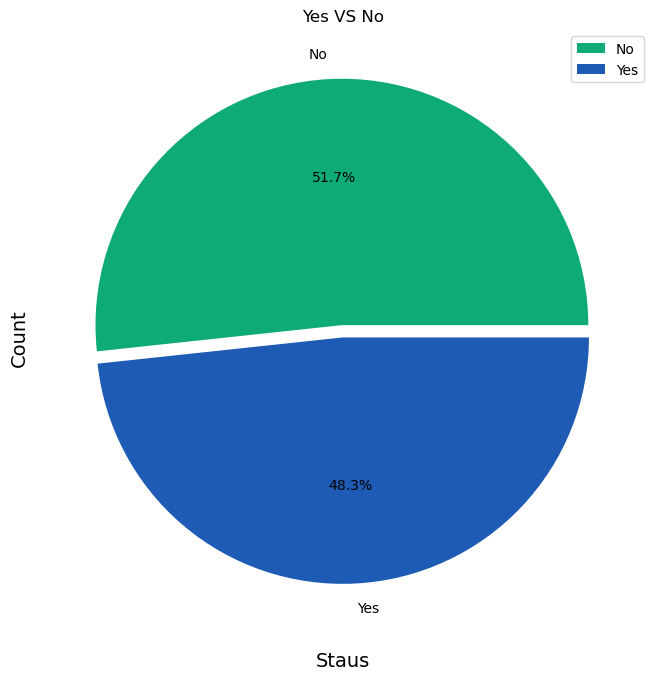

In [51]:
plt.figure(figsize=(12,8))
partner_count = df['Partner'].value_counts()
explode = (0.05,0)
colors = ['#0EAB77', '#1D5BB4']

partner_count.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes VS No')
plt.xlabel('Staus', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(labels = partner_count.index, loc = 'best')
plt.show()

In [52]:
df['Partner'] = df['Partner'].map({'Yes': 1 , 'No':0})

In [54]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

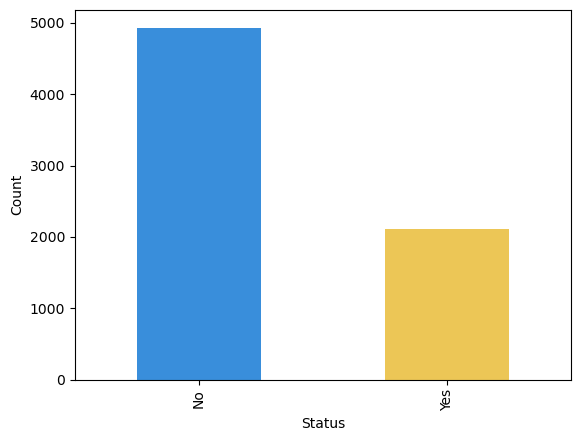

In [63]:
depen_count = df['Dependents'].value_counts()
colors = ['#398EDB', '#ECC656']

depen_count.plot(kind = 'bar', color = colors)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [64]:
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})

In [66]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

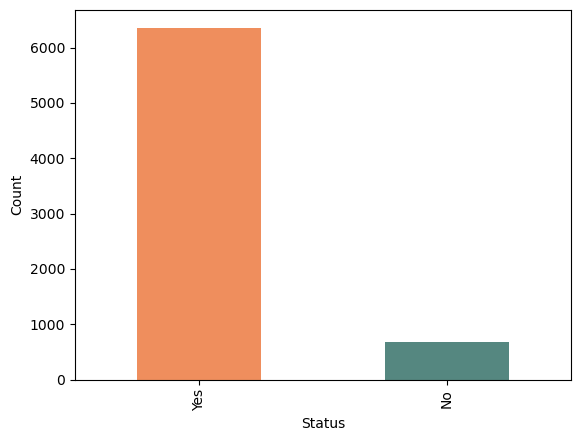

In [68]:
ps_count = df['PhoneService'].value_counts()
colors = ['#EF8E5D', '#558780']

ps_count.plot(kind = 'bar', color = colors)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [69]:
df['PhoneService'] = df['PhoneService'].map({'Yes':1 , 'No':0})

In [70]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

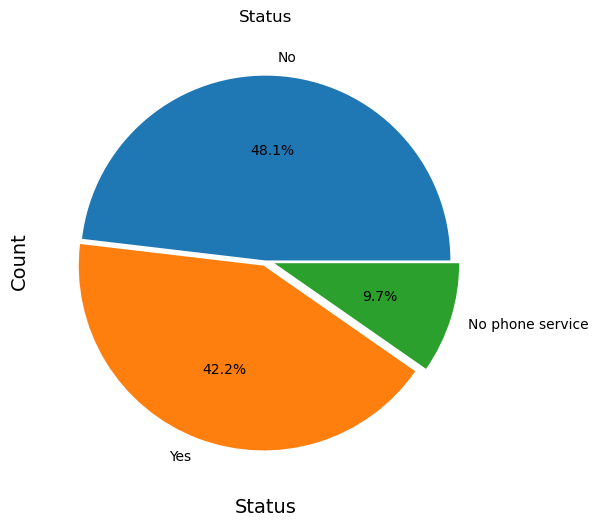

In [81]:
plt.figure(figsize = (20,6))
ml_counts = df['MultipleLines'].value_counts()
explode = (0,0.03,0.05)
color = ['#A0E5FF', '#C5EBCA', '#e1dbc8']

ml_counts.plot(kind = 'pie', explode = explode, color = color ,autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [82]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0,'No phone service':0})

In [93]:
le = LabelEncoder

In [96]:
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df['InternetService'] = le.fit_transform(df['InternetService'])
    df['Contract'] = le.fit_transform(df['Contract'])
    df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [97]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,No,Yes,No,No,No,No,0,Yes,2,29.85,29.85,No
1,0,0,0,0,34,1,0,0,Yes,No,Yes,No,No,No,1,No,3,56.95,1889.5,No
2,0,0,0,0,2,1,0,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,Yes


In [98]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [99]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [112]:
yes_no_col = ['Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_col:
    df[col].replace({'Yes':1, 'No':0}, inplace = True)

In [113]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [105]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

np.int64(11)

In [106]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,0,0,Yes,No,Yes,Yes,Yes,No,2,Yes,0,52.55,,No
753,0,0,0,1,0,1,0,2,No,No,No,No,No,No,2,No,3,20.25,,No
936,1,0,1,1,0,1,0,0,Yes,Yes,Yes,No,Yes,Yes,2,No,3,80.85,,No
1082,0,0,1,1,0,1,1,2,No,No,No,No,No,No,2,No,3,25.75,,No
1340,1,0,1,1,0,0,0,0,Yes,Yes,Yes,Yes,Yes,No,2,No,1,56.05,,No
3331,0,0,1,1,0,1,0,2,No,No,No,No,No,No,2,No,3,19.85,,No
3826,0,0,1,1,0,1,1,2,No,No,No,No,No,No,2,No,3,25.35,,No
4380,1,0,1,1,0,1,0,2,No,No,No,No,No,No,2,No,3,20.00,,No
5218,0,0,1,1,0,1,0,2,No,No,No,No,No,No,1,Yes,3,19.70,,No
6670,1,0,1,1,0,1,1,0,No,Yes,Yes,Yes,Yes,No,2,No,3,73.35,,No


In [115]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [129]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(class_weight='balanced')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [130]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [146]:
df["Churn"].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

In [147]:
X_train.shape

(5625, 19)

In [148]:
X_test.shape

(1407, 19)

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
y_pred = rf.predict(X_test)

y_prob = rf.predict_proba(X_test)[:,1]
y_pred = (y_prob > 0.40).astype(int)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       999
           1       0.62      0.62      0.62       408

    accuracy                           0.78      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.78      0.78      0.78      1407



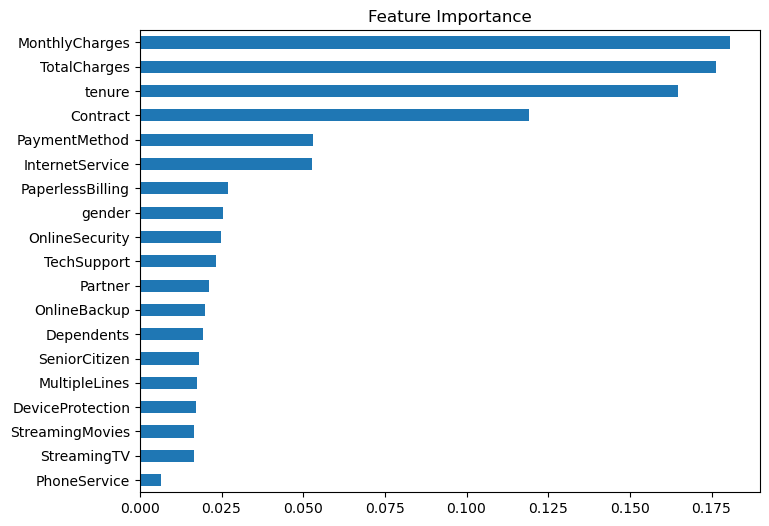

In [173]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

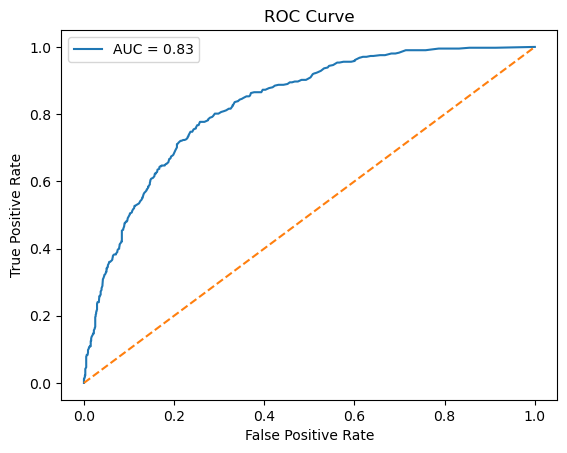

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
